In [1]:
#1
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/aib_fake.csv')
df.head(5)

,title,text,label
0,Feinstein: Gorsuch’s ’Originalist’ Doctrine ’R...,During the Senate Judiciary Committee’s hearin...,0
1,Pence: I Don't Understand 'The Basis' of Miche...,GOP vice presidential candidate Mike Pence sai...,0
2,“Emotionally f**king pissed” media blows embar...,VIDEOS “Emotionally f**king pissed” media blow...,1
3,"Trump Has A SICKENING, Hypocritical Message F...","Donald Trump, the Republican presidential cand...",1
4,Saudi Arabia suspends any dialogue with Qatar:...,DUBAI (Reuters) - Saudi Arabia on Saturday sus...,0


In [2]:
#1
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize the text column
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=500)
X = tfidf_vectorizer.fit_transform(df['text'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.25, random_state=42)


In [3]:
#1
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logistic_classifier = LogisticRegression()

# Fit the classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = logistic_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Logistic Regression: {accuracy:f}')

Accuracy with Logistic Regression: 0.902439


In [4]:
#1
from sklearn.neural_network import MLPClassifier

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(20, 5), random_state=42)

# Fit the classifier on the training data
mlp_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_mlp = mlp_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'Accuracy with MLP Classifier: {accuracy_mlp:f}')


Accuracy with MLP Classifier: 0.899937


In [5]:
#2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

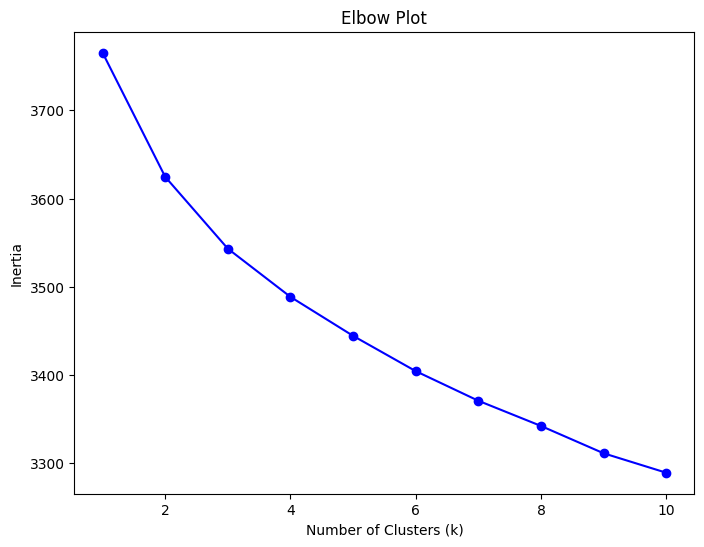

In [6]:
#2
inertia = []

# Create a range of k values (1 to 10)
k_values = range(1, 11)

# Perform KMeans clustering for each value of k and record the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [7]:
#2
# Choose an optimal value of k
optimal_k = 7  # Replace with the chosen number of clusters

# Perform KMeans clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Save the cluster labels as k_labels
k_labels = kmeans.labels_
df['clustering_group'] = k_labels
cluster_counts = df['clustering_group'].value_counts()
print(cluster_counts)
# Find the largest cluster
largest_cluster = cluster_counts.idxmax()

# Filter the data for the largest cluster
largest_cluster_data = df[df['clustering_group'] == largest_cluster]

# Now, you can perform tasks like finding the optimal number of clusters, clustering, and more on this filtered data.



3    2278
6    1014
1     972
5     941
2     607
0     358
4     226
Name: clustering_group, dtype: int64


In [8]:
#3
from textblob import TextBlob

# Create a new column 'sentiment' to store sentiment scores
df['sentiment'] = df['title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Analyze the sentiment scores
fake_sentiments = df[df['label'] == 'fake']['sentiment']
authentic_sentiments = df[df['label'] == 'authentic']['sentiment']

# Calculate the average sentiment scores for fake and authentic news
average_fake_sentiment = fake_sentiments.mean()
average_authentic_sentiment = authentic_sentiments.mean()

# Compare the sentiment scores
if average_fake_sentiment > average_authentic_sentiment:
    print("Fake news article titles have a more positive sentiment.")
else:
    print("Authentic email titles have a more positive sentiment.")


Authentic email titles have a more positive sentiment.


In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Inside the loop for generating word clouds
for cluster in df['clustering_group'].unique():
    cluster_data = df[df['clustering_group'] == cluster]

    # Generate word cloud for fake news titles
    fake_titles = " ".join(cluster_data[(cluster_data['label'] == 'fake') & (cluster_data['title'].notna())]['title'])

    if fake_titles:
        wordcloud = WordCloud(width=800, height=400).generate(fake_titles)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Word Cloud for Cluster {cluster} (Fake Titles)')
        plt.show()

    # Generate word cloud for authentic news titles
    authentic_titles = " ".join(cluster_data[(cluster_data['label'] == 'authentic') & (cluster_data['title'].notna())]['title'])

    if authentic_titles:
        wordcloud = WordCloud(width=800, height=400).generate(authentic_titles)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Word Cloud for Cluster {cluster} (Authentic Titles)')
        plt.show()


In [26]:
from wordcloud import WordCloud
df2=pd.DataFrame()
df2['real'] = df[df['sentiment'] == "authentic"][['title']]
df2['fake'] = df[df['sentiment'] == "fake"][['title']]
df.head()

,title,text,label,clustering_group,sentiment
0,Feinstein: Gorsuch’s ’Originalist’ Doctrine ’R...,During the Senate Judiciary Committee’s hearin...,0,1,0.200000
1,Pence: I Don't Understand 'The Basis' of Miche...,GOP vice presidential candidate Mike Pence sai...,0,5,0.000000
2,“Emotionally f**king pissed” media blows embar...,VIDEOS “Emotionally f**king pissed” media blow...,1,5,0.000000
3,"Trump Has A SICKENING, Hypocritical Message F...","Donald Trump, the Republican presidential cand...",1,5,-0.533333
4,Saudi Arabia suspends any dialogue with Qatar:...,DUBAI (Reuters) - Saudi Arabia on Saturday sus...,0,3,0.000000


In [28]:
# Join the different processed titles together.
long_string = ','.join(list(k_labels==1)).values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

SyntaxError: ignored